# Setup

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from ssm import *
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import os
npr.seed(0)

/opt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# ===== BEFORE EACH EXPERIMENT =====
### Choose these variables
save_data = True
test_type = 'normalized-sym'        # Choose between the ones under, or write a new one
want_another_test = False           # Only for test_type = '?participants...'. If you choose to redo a simulation/test.

In [ ]:
root_dir = os.getcwd()
directory_HMM = os.path.join(root_dir, 'HMM', 'HMM_predictive_templates', test_type)
directory_plot = os.path.join(root_dir, 'plots', 'HMM_predictive_templates', test_type)
os.makedirs(directory_plot, exist_ok=True)  # Create the directories if they do not exist
os.makedirs(directory_HMM, exist_ok=True)

bias = False          # by default
test_type_title = ''

ext_var = 'contrast'            # orientation or contrast as external variable
ext_var_title = 'Contrast'      # Orientation or Contrast as external variable

# === with contrast as external variable ===        # by default
if test_type == 'contrast':
    test_type_title = ''

# === with orientation as external variable ===
elif test_type == 'orientation':
    test_type_title = ' - orientation'
    ext_var = 'orientation'       
    ext_var_title = 'Orientation' 

# === with bias ===
elif test_type == 'withbias':
    test_type_title = ' - with bias'
    bias = True

# === with 5 participants only ===
elif test_type == '5participants':
    test_type_title = ' - 5 participants'

# === with 5 participants only, with bias ===
elif test_type == '5participants-withbias':
    test_type_title = ' - 5 participants, with bias'
    bias = True

# === with 6 participants only ===
elif test_type == '6participants':
    test_type_title = ' - 6 participants'

# === with 6 participants only, with bias ===
elif test_type == '6participants-withbias':
    test_type_title = ' - 6 participants, with bias'
    bias = True

# === with normalization of inputs ===   
elif test_type == 'normalized':
    test_type_title = ' - normalized'

# === with normalization of inputs ===   
elif test_type == 'normalized-sym':
    test_type_title = ' - normalized with symmetry'

## Load and prepare inputs

In [ ]:
if test_type.startswith("6participants") and want_another_test == False:
    df = pd.read_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/Full_HMM_{test_type}.csv')
elif test_type.startswith("5participants") and want_another_test == False:
    df = pd.read_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/Full_HMM_{test_type}.csv')
else :
    df = pd.read_csv(root_dir + '/Full_Data/Full_Data_predictive_templates.csv')

In [ ]:
if want_another_test == True:
    df = pd.read_csv(root_dir + '/Full_Data/Full_Data_predictive_templates.csv')
    if test_type.startswith("6participants"):
        selected_ids = np.random.choice(df["ID"].unique(), size=6, replace=False)
        df = df[df["ID"].isin(selected_ids)]
        if save_data:
            df.to_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/Full_HMM_{test_type}.csv', index = False)
    if test_type.startswith("5participants"):
        selected_ids = np.random.choice(df["ID"].unique(), size=5, replace=False)
        df = df[df["ID"].isin(selected_ids)]
        if save_data:
            df.to_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/Full_HMM_{test_type}.csv', index = False)

In [ ]:
if test_type.startswith("normalized"):
    #df[ext_var] = df[ext_var].replace(1, 0.5)  
    df[ext_var] = df[ext_var].replace(2, 2.5) 

    if test_type == "normalized":
        # Normalize previous only where it is non 0 
        prev_nonzero = df['previous_response'] != 0
        prev_mean = df.loc[prev_nonzero, 'previous_response'].mean()
        prev_std = df.loc[prev_nonzero, 'previous_response'].std()

        df['previous_response'] = df['previous_response']  
        df.loc[prev_nonzero, 'previous_response'] = (
            (df.loc[prev_nonzero, 'previous_response'] - prev_mean) / prev_std
        )
   

In [300]:
summary = {}
for col in df.columns:
    unique_values, counts = np.unique(df[col], return_counts=True)
    summary[col] = {str(value): int(count) for value, count in zip(unique_values, counts)}

for col, types in summary.items():
    formatted_counts = ", ".join(f"{key} : {value}" for key, value in types.items())
    print(f"{col}: {formatted_counts}")

response: 0 : 28758, 1 : 20183
previous_response: -1 : 28741, 0 : 22, 1 : 20178
contrast: -1.0 : 21643, 1.0 : 21650, 2.5 : 5648
previous_contrast: 0 : 21654, 1 : 21640, 2 : 5647
orientation: -10.0 : 2824, -3.0 : 3191, -2.0 : 3083, -1.0 : 3196, 0.0 : 3031, 1.0 : 2965, 2.0 : 3133, 3.0 : 3051, 10.0 : 2824, nan : 21643
ID: 1 : 1500, 2 : 2500, 3 : 2500, 4 : 2500, 5 : 2300, 6 : 2500, 7 : 2500, 8 : 1800, 9 : 2500, 10 : 1600, 11 : 1700, 12 : 2500, 13 : 2500, 14 : 1441, 15 : 2500, 16 : 2500, 17 : 2400, 18 : 2500, 19 : 2200, 20 : 2300, 21 : 1700, 22 : 2500
predictor: -1 : 18651, 0 : 10006, 1 : 3087, 2 : 11656, 3 : 5541
Gl_Prob_State_ext: 0.0011233185866158 : 1, 0.0013198264592364 : 1, 0.001482324352332 : 1, 0.0015431764897639 : 1, 0.0015501350581403 : 1, 0.0016500805392514 : 1, 0.0016579881694095 : 1, 0.0016651547662282 : 1, 0.0017379614784886 : 1, 0.0017423850610524 : 1, 0.0017799025639093 : 1, 0.0019806254154817 : 1, 0.0019884486063346 : 1, 0.0020133826726249 : 1, 0.0020581662637001 : 1, 0.002

## Plot correctness and congruence

### Plot correctness

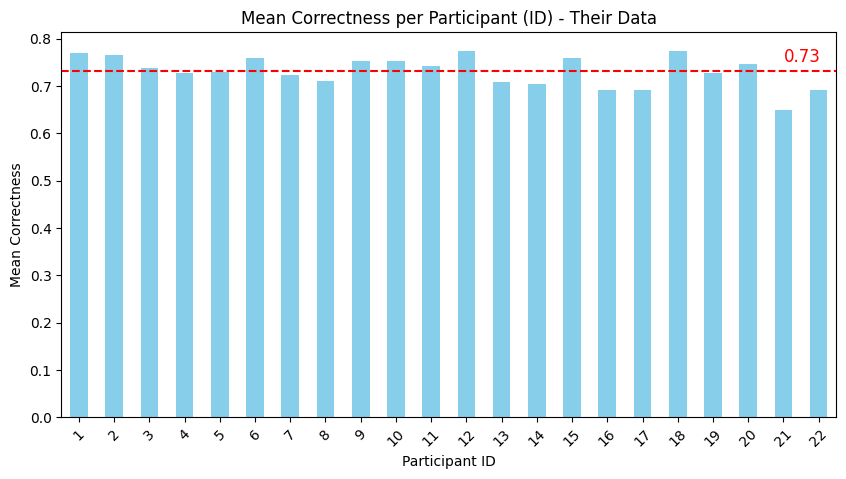

In [ ]:
df['correct'] = np.where(df['orientation'].isna() & (df['response'] == 0), 1,
                np.where(df['orientation'].isna() & (df['response'] == 1), 0,
                np.where(~df['orientation'].isna() & (df['response'] == 1), 1, 0)))


mean_correctness = df.groupby("ID")["correct"].mean()
mean_of_means = mean_correctness.mean()

plt.figure(figsize=(10, 5))
mean_correctness.plot(kind="bar", color="skyblue")
plt.axhline(mean_of_means, color="red", linestyle="--", label=f"Mean of Means: {mean_of_means:.2f}")
plt.text(len(mean_correctness) - 2, mean_of_means + 0.02, f"{mean_of_means:.2f}", color="red", fontsize=12)

plt.title("Mean Correctness per Participant (ID) - Their Data")
plt.xlabel("Participant ID")
plt.ylabel("Mean Correctness")
plt.xticks(rotation=45)

if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/mean_correctness_per_participant.png', bbox_inches="tight")
plt.show()

/var/folders/hc/f0q04dfj06d1b1f0nks6jk_00000gn/T/ipykernel_8407/4053364928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['correct'] = np.where(filtered_df['orientation'].isna() & (filtered_df['response'] == 0), 1,


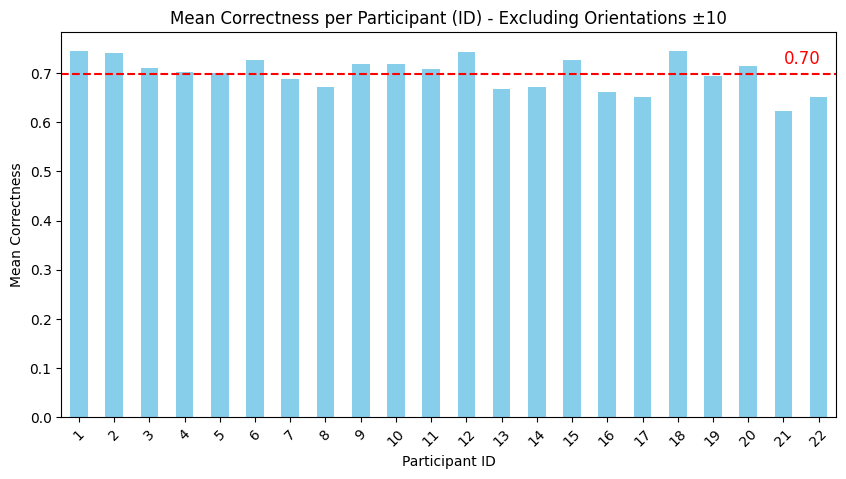

In [ ]:
# Exclude rows where orientation is 10 or -10
filtered_df = df[~df['orientation'].isin([10, -10])]

filtered_df['correct'] = np.where(filtered_df['orientation'].isna() & (filtered_df['response'] == 0), 1,
                         np.where(filtered_df['orientation'].isna() & (filtered_df['response'] == 1), 0,
                         np.where(~filtered_df['orientation'].isna() & (filtered_df['response'] == 1), 1, 0)))

mean_correctness = filtered_df.groupby("ID")["correct"].mean()
mean_of_means = mean_correctness.mean()

plt.figure(figsize=(10, 5))
mean_correctness.plot(kind="bar", color="skyblue")
plt.axhline(mean_of_means, color="red", linestyle="--", label=f"Mean of Means: {mean_of_means:.2f}")
plt.text(len(mean_correctness) - 2, mean_of_means + 0.02, f"{mean_of_means:.2f}", color="red", fontsize=12)

plt.title("Mean Correctness per Participant (ID) - Excluding Orientations ±10")
plt.xlabel("Participant ID")
plt.ylabel("Mean Correctness")
plt.xticks(rotation=45)

if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/mean_correctness_per_participant_filtered.png', bbox_inches="tight")
plt.show()


In [ ]:
# Filter the dataframe for orientation -10 and 0
orientation_minus_10 = df[df['orientation'] == 10]
orientation_zero = df[df['orientation'] == 3]

percent_correct_minus_10 = orientation_minus_10['correct'].mean() * 100
percent_correct_zero = orientation_zero['correct'].mean() * 100

print(f"Percentage of correct responses when orientation is -10: {percent_correct_minus_10:.2f}%")
print(f"Percentage of correct responses when orientation is 3: {percent_correct_zero:.2f}%")


Percentage of correct responses when orientation is -10: 98.19%
Percentage of correct responses when orientation is 0: 55.06%


### Verify the congruence

In [ ]:
# Compute prev_resp_congruent:
# - when prev_resp < 0 and resp = 0 → congruent
# - when prev_resp > 0 and resp = 1 → congruent
df["prev_resp_congruent"] = np.where(
    ((df["previous_response"] < 0) & (df["response"] == 0)) |
    ((df["previous_response"] > 0) & (df["response"] == 1)),
    1,
    0
)

assert test_type != 'orientation'
# Compute orientation_congruent:
# - when ext_var < 0 and resp = 0 → congruent
# - when ext_var > 0 and resp = 1 → congruent
df[f"{ext_var}_congruent"] = np.where(
    ((df[ext_var] < 0) & (df["response"] == 0)) |
    ((df[ext_var] > 0) & (df["response"] == 1)) ,
    1,
    0
)


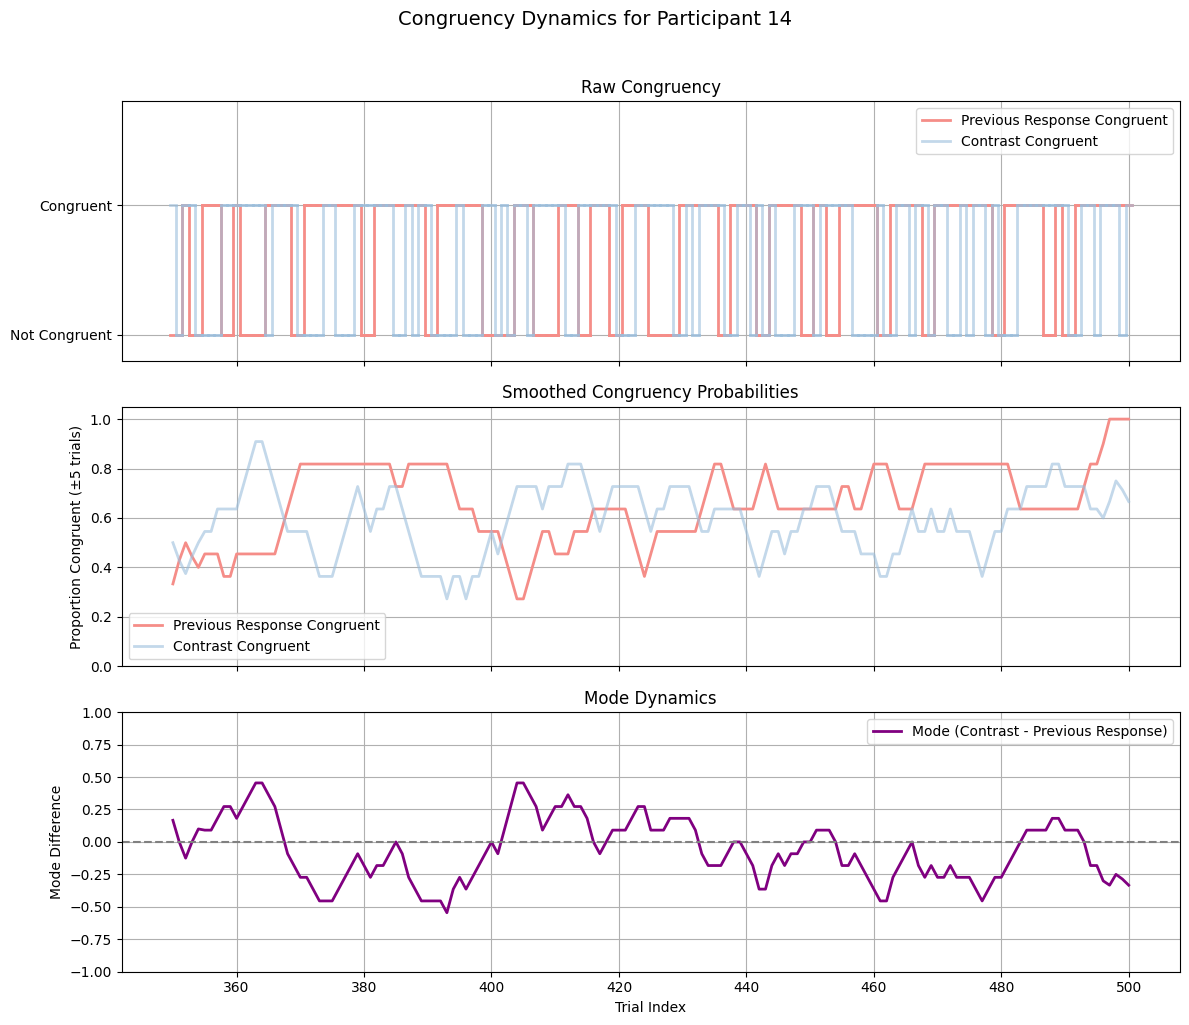

In [ ]:
selected_id = 14    # by default, from 1 to 22
window_size = 5     # ±5 trials
n_initial = 350     
n_final = 501
df_congruence = df[(df["ID"] == selected_id)].copy()
df_congruence = df_congruence.iloc[n_initial:n_final].reset_index(drop=True)

x_sample = np.arange(n_initial, n_final)
y1 = df_congruence["prev_resp_congruent"].values
y2 = df_congruence[f"{ext_var}_congruent"].values

def draw_step_signal(ax, x, y, color, alpha=1):
    for i in range(len(x) - 1):
        ax.plot([x[i]-0.5, x[i]+0.5], [y[i], y[i]], color=color, linewidth=2, alpha=alpha)
        if y[i] == y[i+1]:
            ax.plot([x[i]+0.5, x[i+1]+0.5], [y[i], y[i+1]], color=color, linewidth=2, alpha=alpha)
        else:
            ax.vlines(x[i]+0.5, 0, 1, colors=color, linewidth=2, alpha=alpha)
            ax.plot([x[i]+0.5, x[i+1]+0.5], [y[i+1], y[i+1]], color=color, linewidth=2, alpha=alpha)

def smooth_congruency(arr, window):
    return np.array([
        np.mean(arr[max(0, i - window):min(len(arr), i + window + 1)])
        for i in range(len(arr))
    ])

y1_smooth = smooth_congruency(y1, window_size)
y2_smooth = smooth_congruency(y2, window_size)
mode_sample = y2_smooth - y1_smooth

# === Plot all 3 in stacked subplots ===
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# 1. Step plot of raw congruencies
draw_step_signal(axs[0], x_sample, y1, color="#f58d88")
draw_step_signal(axs[0], x_sample, y2, color="#9bbedc", alpha=0.6)
axs[0].set_ylim(-0.2, 1.8)
axs[0].set_yticks([0, 1])
axs[0].set_yticklabels(["Not Congruent", "Congruent"])
axs[0].set_title("Raw Congruency")
legend_elements = [
    Line2D([0], [0], color='#f58d88', lw=2, label='Previous Response Congruent'),
    Line2D([0], [0], color='#9bbedc', lw=2, label=f'{ext_var_title} Congruent', alpha=0.6)
]
axs[0].legend(handles=legend_elements)
axs[0].grid(True)

# 2. Smoothed probabilities
axs[1].plot(x_sample, y1_smooth, label="Previous Response Congruent", color="#f58d88", linewidth=2)
axs[1].plot(x_sample, y2_smooth, label=f"{ext_var_title} Congruent", color="#9bbedc", linewidth=2, alpha=0.6)
axs[1].set_ylim(0, 1.05)
axs[1].set_ylabel("Proportion Congruent (±5 trials)")
axs[1].set_title("Smoothed Congruency Probabilities")
axs[1].legend()
axs[1].grid(True)

# 3. Mode
axs[2].plot(x_sample, mode_sample, color="purple", linewidth=2, label=f"Mode ({ext_var_title} - Previous Response)")
axs[2].axhline(0, color="gray", linestyle="--", linewidth=1.5)
axs[2].set_ylim(-1, 1)
axs[2].set_xlabel("Trial Index")
axs[2].set_ylabel("Mode Difference")
axs[2].set_title("Mode Dynamics")
axs[2].legend()
axs[2].grid(True)

if n_initial != 0:  
    plt.suptitle(f"Congruency Dynamics for Participant {selected_id}", fontsize=14, y=1.02)
else:
    plt.suptitle(f"Congruency Dynamics for Participant {selected_id}", fontsize=14, y=1.02)
plt.tight_layout()

if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/congruency_sample.png', bbox_inches="tight")

plt.show()


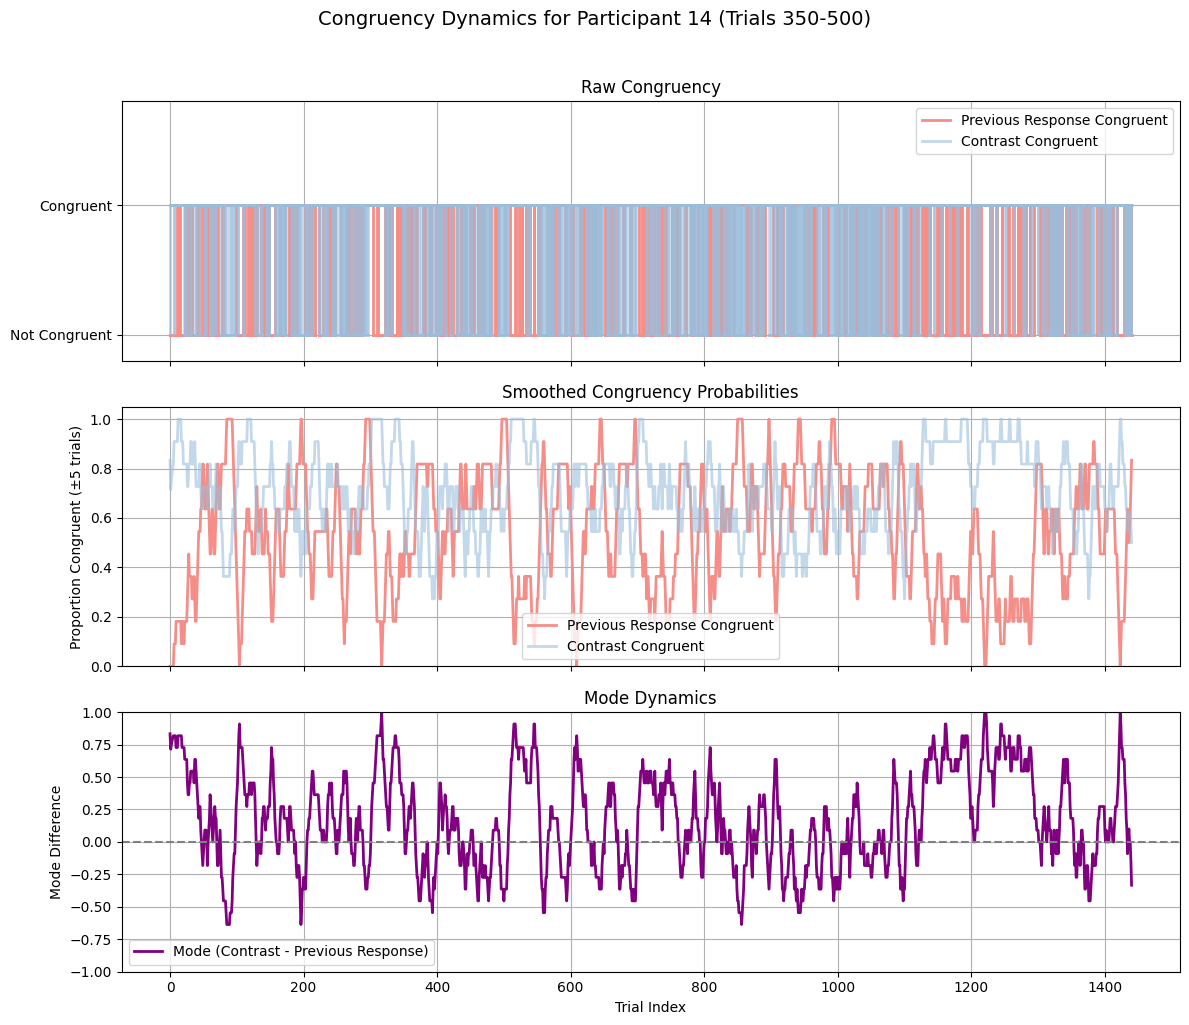

In [ ]:
df_congruence = df[(df["ID"] == selected_id)].copy()

x_alltrials = np.arange(len(df_congruence["ID"]))
y1 = df_congruence["prev_resp_congruent"].values
y2 = df_congruence[f"{ext_var}_congruent"].values

def draw_step_signal(ax, x, y, color, alpha=1):
    for i in range(len(x) - 1):
        ax.plot([x[i]-0.5, x[i]+0.5], [y[i], y[i]], color=color, linewidth=2, alpha=alpha)
        if y[i] == y[i+1]:
            ax.plot([x[i]+0.5, x[i+1]+0.5], [y[i], y[i+1]], color=color, linewidth=2, alpha=alpha)
        else:
            ax.vlines(x[i]+0.5, 0, 1, colors=color, linewidth=2, alpha=alpha)
            ax.plot([x[i]+0.5, x[i+1]+0.5], [y[i+1], y[i+1]], color=color, linewidth=2, alpha=alpha)

def smooth_congruency(arr, window):
    return np.array([
        np.mean(arr[max(0, i - window):min(len(arr), i + window + 1)])
        for i in range(len(arr))
    ])

y1_smooth = smooth_congruency(y1, window_size)
y2_smooth = smooth_congruency(y2, window_size)
mode_alltrials = y2_smooth - y1_smooth

# === Plot all 3 in stacked subplots ===
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# 1. Step plot of raw congruencies
draw_step_signal(axs[0], x_alltrials, y1, color="#f58d88")
draw_step_signal(axs[0], x_alltrials, y2, color="#9bbedc", alpha=0.6)
axs[0].set_ylim(-0.2, 1.8)
axs[0].set_yticks([0, 1])
axs[0].set_yticklabels(["Not Congruent", "Congruent"])
axs[0].set_title("Raw Congruency")
legend_elements = [
    Line2D([0], [0], color='#f58d88', lw=2, label='Previous Response Congruent'),
    Line2D([0], [0], color='#9bbedc', lw=2, label=f'{ext_var_title} Congruent', alpha=0.6)
]
axs[0].legend(handles=legend_elements)
axs[0].grid(True)

# 2. Smoothed probabilities
axs[1].plot(x_alltrials, y1_smooth, label="Previous Response Congruent", color="#f58d88", linewidth=2)
axs[1].plot(x_alltrials, y2_smooth, label=f"{ext_var_title} Congruent", color="#9bbedc", linewidth=2, alpha=0.6)
axs[1].set_ylim(0, 1.05)
axs[1].set_ylabel("Proportion Congruent (±5 trials)")
axs[1].set_title("Smoothed Congruency Probabilities")
axs[1].legend()
axs[1].grid(True)

# 3. Mode
axs[2].plot(x_alltrials, mode_alltrials, color="purple", linewidth=2, label=f"Mode ({ext_var_title} - Previous Response)")
axs[2].axhline(0, color="gray", linestyle="--", linewidth=1.5)
axs[2].set_ylim(-1, 1)
axs[2].set_xlabel("Trial Index")
axs[2].set_ylabel("Mode Difference")
axs[2].set_title("Mode Dynamics")
axs[2].legend()
axs[2].grid(True)

if n_initial != 0:  
    plt.suptitle(f"Congruency Dynamics for Participant {selected_id} (Trials {n_initial}-{n_final-1})", fontsize=14, y=1.02)
else:
    plt.suptitle(f"Congruency Dynamics for Participant {selected_id}", fontsize=14, y=1.02)
plt.tight_layout()

if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/congruency_sample_alltrials.png', bbox_inches="tight")

plt.show()


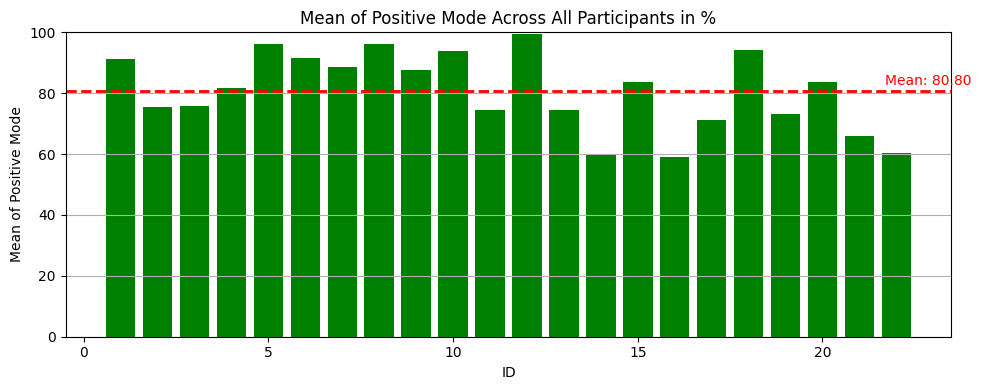

In [ ]:
all_ids = df["ID"].unique()

# Function to compute percentage of positive mode per block for a given ID
def compute_blockwise_positive_mode(df, id_val):
    df_id = df[df["ID"] == id_val]
    positive_percentages = []

    y1 = df_id["prev_resp_congruent"].values
    y2 = df_id[f"{ext_var}_congruent"].values
    y1_smooth = smooth_congruency(y1, window_size)
    y2_smooth = smooth_congruency(y2, window_size)
    mode = y2_smooth - y1_smooth
    percent_positive = np.sum(mode > 0) / len(mode) * 100
    positive_percentages.append(percent_positive)

    return positive_percentages

# ---- Step 1: Compute mean positive mode for all IDs ----
mean_positive_modes_all_ids = []

for id_val in all_ids:
    percentages = compute_blockwise_positive_mode(df, id_val)
    mean_val = np.nanmean(percentages)
    mean_positive_modes_all_ids.append(mean_val)

# ---- Step 2: Plot mean positive mode for all IDs ----
plt.figure(figsize=(10, 4))
plt.bar(all_ids, mean_positive_modes_all_ids, color="green")
plt.ylim(0, 100)
plt.xlabel("ID")
plt.ylabel("Mean of Positive Mode")
plt.title("Mean of Positive Mode Across All Participants in %")
overall_mean = np.nanmean(mean_positive_modes_all_ids)
plt.axhline(overall_mean, color="red", linestyle="--", linewidth=2, label=f"Mean = {overall_mean:.2f}")
plt.text(all_ids[-1] - 0.3, overall_mean + 2, f"Mean: {overall_mean:.2f}", color="red")

plt.grid(axis='y')
plt.tight_layout()
if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/mode_per_ID.png', bbox_inches="tight")
plt.show()


# Initialize GLM-HMM

In [308]:
### Set the parameters of the GLM-HMM
obs_dim = 1           # number of observed dimensions
num_categories = 2    # number of categories for output
if bias == True:
    input_dim = 3        # input dimensions
else : input_dim = 2
N_iters = 500

In [ ]:
inpts = []
choices = []
participants = df["ID"].unique()

for load_idx in participants:
    this_data = df.loc[df['ID'] == load_idx].copy()
        ## start with estimating the experiment as a whole
    num_sess = 1
    num_trials_per_sess = len(this_data)

    new_inpts = []
    new_choices = []

    new_inpts = np.ones((num_trials_per_sess, input_dim))

    ## get input format
    if test_type == 'orientation':
        new_inpts[:, 0] = np.where(~np.isnan(this_data['orientation'].copy()), 1, -1)
    else:
        new_inpts[:, 0] = this_data[ext_var].copy()
    new_inpts[:, 1] = this_data['previous_response'].copy()
    #new_inpts[:, 2] = this_data['previous_contrast'].copy()
    if bias == True:
        new_inpts[:, 2] = np.ones(this_data.shape[0])   
    inpts.append(new_inpts)
    
    new_choices = this_data['response'].copy()
    new_choices = np.atleast_2d(new_choices).T
    choices.append(new_choices) 

# Fit at group-level in one-state GLM-HMM

In [310]:
### fit one state GLM-HMM at group level

num_states = 1
n_iter = 100

transition_alpha = 1
prior_sigma = 10
 
if bias == True:
    iter_array = np.full([n_iter, 3], np.nan)  
else : iter_array = np.full([n_iter, 2], np.nan) 
for idx in range(n_iter):
    
    one_state_glmhmm = HMM(num_states, obs_dim, input_dim, 
                    observations="input_driven_obs", 
                    observation_kwargs=dict(C=num_categories, prior_sigma=prior_sigma), 
                    transitions="sticky", 
                    transition_kwargs=dict(alpha=transition_alpha, kappa=0))
    print(one_state_glmhmm.params)
    one_state_glmhmm.fit(choices, inputs=inpts, method="em", num_iters=N_iters, initialize = True, tolerance=10**-4, verbose = False)

    if bias == True:
        iter_array[idx,] = one_state_glmhmm.observations.params.reshape((1,3))
    else : iter_array[idx,] = one_state_glmhmm.observations.params.reshape((1,2))


((array([-0.]),), (array([[0.]]),), array([[[0.74159174, 1.55291372]]]))
((array([-0.]),), (array([[0.]]),), array([[[ 1.86755799, -0.97727788]]]))
((array([-0.]),), (array([[0.]]),), array([[[ 1.26611853, -0.50587654]]]))
((array([-0.]),), (array([[0.]]),), array([[[0.76103773, 0.12167502]]]))
((array([-0.]),), (array([[0.]]),), array([[[0.48431215, 0.57914048]]]))
((array([-0.]),), (array([[0.]]),), array([[[ 1.49407907, -0.20515826]]]))
((array([-0.]),), (array([[0.]]),), array([[[-0.96075461,  0.37692697]]]))
((array([-0.]),), (array([[0.]]),), array([[[-2.55298982,  0.6536186 ]]]))
((array([-0.]),), (array([[0.]]),), array([[[-0.24214951,  1.51439128]]]))
((array([-0.]),), (array([[0.]]),), array([[[ 0.04575852, -0.18718385]]]))
((array([-0.]),), (array([[0.]]),), array([[[0.56644004, 0.14926509]]]))
((array([-0.]),), (array([[0.]]),), array([[[-0.88778575, -1.98079647]]]))
((array([-0.]),), (array([[0.]]),), array([[[ 0.17538653, -0.46250554]]]))
((array([-0.]),), (array([[0.]]),

In [ ]:
if bias == True:
    df_iter_array = pd.DataFrame(iter_array, columns = [ext_var, 'previous_response', 'bias']) 
else:
    df_iter_array = pd.DataFrame(iter_array, columns = [ext_var, 'previous_response'])

if save_data:
    df_iter_array.to_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/one_level_HMM_params.csv', index = False) 

In [ ]:
df_iter_array = pd.read_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/one_level_HMM_params.csv')
params_for_initalization = df_iter_array.mean().values
print(params_for_initalization)

[-1.01615602 -0.48788   ]


# Fit multi-state GLM-HMMs at group-level and compare BIC

In [ ]:
## compare models based on BIC
max_num_states =  2    # number of discrete states

N_iters = 500 # maximum number of EM iterations. Fitting with stop earlier if increase in LL is below tolerance specified by tolerance parameter
# Make a GLM-HMM
prior_sigma = 10
transition_alpha = 1

BIC = []
for state_idx in range(max_num_states): 
    print(state_idx)
    compare_glmhmm = HMM(state_idx+1, obs_dim, input_dim, 
                    observations="input_driven_obs", 
                    observation_kwargs=dict(C=num_categories, prior_sigma=prior_sigma), 
                    transitions="sticky", 
                    transition_kwargs=dict(alpha=transition_alpha, kappa=0))

    
    _ = compare_glmhmm.fit(choices, inputs=inpts, method="em", num_iters=N_iters, initialize = True, tolerance=10**-4, verbose = False)
    n_total_params = np.concatenate(compare_glmhmm.observations.params).size + np.concatenate(compare_glmhmm.transitions.params).size
    
    # Flatten choices and inpts to calculate log likelihood correctly
    flattened_choices = np.concatenate(choices)
    flattened_inpts = np.concatenate(inpts)

    new_BIC = np.log(np.size(flattened_choices))*n_total_params - 2*compare_glmhmm.log_likelihood(choices, inputs=inpts)
    
    if save_data:
        pd.DataFrame(np.append(new_BIC, np.concatenate(compare_glmhmm.observations.params))).to_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/Full_model_outcome_states_' + str(state_idx + 1) + '.csv', index = False) 

    BIC = np.append(BIC, new_BIC) 
    print(compare_glmhmm.observations.params)

df_BIC = pd.DataFrame({'BIC': BIC, 'num_states': np.arange(max_num_states) + 1})


if save_data:
    df_BIC.to_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/BIC_across_models.csv', index = False) 


0


[[[-1.01621891 -0.48793201]]]
1
[[[-1.15962999 -0.04966129]]

 [[-0.99927927 -1.49225205]]]


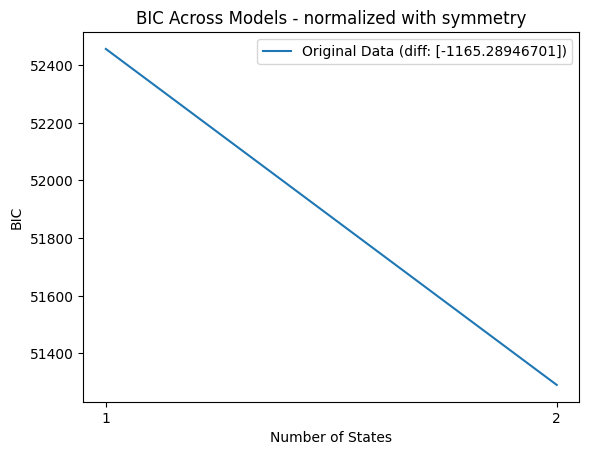

In [ ]:
df_BIC = pd.read_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/BIC_across_models.csv') 
bic_diff = np.diff(df_BIC.BIC)

plt.plot(df_BIC['num_states'], df_BIC['BIC'], label=f'Original Data (diff: {bic_diff})')
plt.title(f'BIC Across Models{test_type_title}')
plt.xlabel('Number of States')
plt.ylabel('BIC')
plt.legend()
plt.xticks([1, 2])
if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/BIC_across_models.png', bbox_inches='tight') 


# Fit permuted multi-state GLM-HMMs at group-level and compare BIC

In [ ]:
# Permutation analysis
n_perm = 100
BIC_permuted = []

for perm_idx in range(n_perm):
    permuted_choices = []
    permuted_inpts = []
    
    for i in range(len(choices)):
        perm_indices = np.random.permutation(choices[i].shape[0])
        permuted_choices.append(choices[i][perm_indices])
        permuted_inpts.append(inpts[i][perm_indices])
    
    for state_idx in range(max_num_states):
        print(f"Permutation {perm_idx}, State {state_idx}")
        permuted_glmhmm = HMM(state_idx + 1, obs_dim, input_dim, 
                                  observations="input_driven_obs", 
                                  observation_kwargs=dict(C=num_categories, prior_sigma=prior_sigma), 
                                  transitions="sticky", 
                                  transition_kwargs=dict(alpha=transition_alpha, kappa=0))

        _ = permuted_glmhmm.fit(permuted_choices, inputs=permuted_inpts, method="em", num_iters=N_iters, initialize=True, tolerance=10**-4, verbose=False)

        n_total_params = np.concatenate(permuted_glmhmm.observations.params).size + np.concatenate(permuted_glmhmm.transitions.params).size

        # Compute log likelihood
        log_likelihood = permuted_glmhmm.log_likelihood(permuted_choices, inputs=permuted_inpts)

        # Compute BIC
        new_BIC = np.log(len(flattened_choices)) * n_total_params - 2 * log_likelihood
        BIC_permuted.append({'perm_idx': perm_idx, 'state_idx': state_idx + 1, 'BIC': new_BIC})

df_BIC_permuted = pd.DataFrame(BIC_permuted)
if save_data:
    df_BIC_permuted.to_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/BIC_permuted_across_models.csv', index=False) 

Permutation 0, State 0
Permutation 0, State 1
Permutation 1, State 0
Permutation 1, State 1
Permutation 2, State 0
Permutation 2, State 1
Permutation 3, State 0
Permutation 3, State 1
Permutation 4, State 0
Permutation 4, State 1
Permutation 5, State 0
Permutation 5, State 1
Permutation 6, State 0
Permutation 6, State 1
Permutation 7, State 0
Permutation 7, State 1
Permutation 8, State 0
Permutation 8, State 1
Permutation 9, State 0
Permutation 9, State 1
Permutation 10, State 0
Permutation 10, State 1
Permutation 11, State 0
Permutation 11, State 1
Permutation 12, State 0
Permutation 12, State 1
Permutation 13, State 0
Permutation 13, State 1
Permutation 14, State 0
Permutation 14, State 1
Permutation 15, State 0
Permutation 15, State 1
Permutation 16, State 0
Permutation 16, State 1
Permutation 17, State 0
Permutation 17, State 1
Permutation 18, State 0
Permutation 18, State 1
Permutation 19, State 0
Permutation 19, State 1
Permutation 20, State 0
Permutation 20, State 1
Permutation 

In [ ]:
df_BIC_permuted = pd.read_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/BIC_permuted_across_models.csv') 

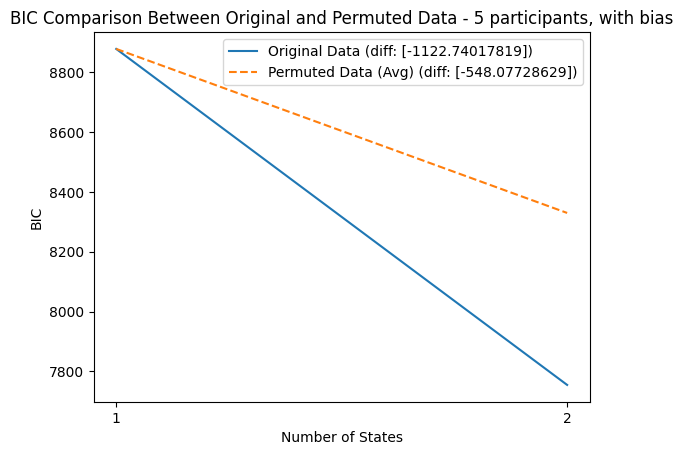

In [ ]:
# Average BIC across permutations
df_BIC_permuted_avg = df_BIC_permuted.groupby('state_idx').agg({'BIC': 'mean'}).reset_index()
bic_diff = np.diff(df_BIC['BIC'])
bic_diff_permuted = np.diff(df_BIC_permuted_avg['BIC'])

# Plotting
plt.plot(df_BIC['num_states'], df_BIC['BIC'], label=f'Original Data (diff: {bic_diff})')
plt.plot(df_BIC_permuted_avg['state_idx'], df_BIC_permuted_avg['BIC'], label=f'Permuted Data (Avg) (diff: {bic_diff_permuted})', linestyle='--')
plt.xlabel('Number of States')
plt.ylabel('BIC')
plt.legend()
plt.title(f'BIC Comparison Between Original and Permuted Data{test_type_title}')
plt.xticks([1, 2])
if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/BIC_comparison.png', bbox_inches='tight')
plt.show()



# Fit two-state GLM-HMMs 

In [ ]:
npr.seed(0)
# Set the parameters of the GLM-HMM
num_states =  2      # number of discrete states
obs_dim = 1           # number of observed dimensions
num_categories = 2    # number of categories for output
if bias == True:    
    input_dim = 3      # input dimensions 
else : input_dim = 2  

N_iters = 500 # maximum number of EM iterations. Fitting with stop earlier if increase in LL is below tolerance specified by tolerance parameter
# Make a GLM-HMM

prior_sigma = 10
transition_alpha = 1

n_iter = 10
if bias == True:
    parameters_ext_int = np.full([n_iter, 10], np.nan) 
else:
    parameters_ext_int = np.full([n_iter, 8], np.nan)
for idx in range(n_iter):
    print(idx)
    glmhmm = HMM(num_states, obs_dim, input_dim, 
                        observations="input_driven_obs", 
                        observation_kwargs=dict(C=num_categories, prior_sigma=prior_sigma), 
                        transitions="sticky", 
                        transition_kwargs=dict(alpha=transition_alpha, kappa=0))
    
    # === to use if you want to initialize the parameters with the ones found when one state only ===
    #glmhmm.observations.params =  np.tile(params_for_initalization, (num_states,1)).reshape(num_states, 1, 3)
    _ = glmhmm.fit(choices, inputs=inpts, method="em", num_iters=N_iters, initialize = True, tolerance=10**-4, verbose = False)
   
    index_ext = np.argmax(np.concatenate(-glmhmm.observations.params)[:,0])
    index_int = np.argmin(np.concatenate(-glmhmm.observations.params)[:,0])
    parameters_ext_int[idx,] = np.concatenate((-glmhmm.observations.params[index_ext,:], -glmhmm.observations.params[index_int,:], glmhmm.transitions.params[0].reshape(1,4)), axis = 1)
    del(glmhmm)

0
1
2
3
4
5
6
7
8
9


We choose the external state as state 1: the state where the ext_var coefficient is the highest between the two found states.

In [ ]:
if bias == True:
    df_two_state_init = pd.DataFrame(parameters_ext_int, columns = [f'{ext_var}_ext', 'previous_response_ext', 'bias_ext',
                                                                f'{ext_var}_int', 'previous_response_int', 'bias_int',
                                                                 'AA', 'AB', 'BA', 'BB'])
else:
    df_two_state_init = pd.DataFrame(parameters_ext_int, columns = [f'{ext_var}_ext', 'previous_response_ext',
                                                                f'{ext_var}_int', 'previous_response_int',
                                                                 'AA', 'AB', 'BA', 'BB'])


In [ ]:
if save_data:
    df_two_state_init.to_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/two_state_init_param.csv', index = False) 

## Weights Coefficients

In [ ]:
df_two_state_init = pd.read_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/two_state_init_param.csv') 

In [319]:
df_two_state_init.mean()

contrast_ext             1.159086
previous_response_ext    0.050128
contrast_int             0.999693
previous_response_int    1.493780
AA                      -0.033494
AB                      -3.487458
BA                      -3.334527
BB                      -0.038871
dtype: float64

In [ ]:
external_ratio = np.exp(df_two_state_init.mean()[f'{ext_var}_ext'])/np.exp(df_two_state_init.mean()['previous_response_ext'])
internal_ratio = np.exp(df_two_state_init.mean()[f'{ext_var}_int'])/np.exp(df_two_state_init.mean()['previous_response_int'])

print("External state ratio (ext_var/prev_var):", external_ratio)
print("Internal state ratio (ext_var/prev_var):", internal_ratio)

c_external_ratio = 100*external_ratio/(external_ratio+1)
c_internal_ratio = 100*internal_ratio/(internal_ratio+1)
print("External state ratio in % (ext_var/prev_var):", c_external_ratio, "/", 100-c_external_ratio)
print("Internal state ratio in % (ext_var/prev_var):", c_internal_ratio, "/", 100-c_internal_ratio)

External state ratio (c/pr): 3.0311975160062863
Internal state ratio (c/pr): 0.6101276967303311
External state ratio in % (c/pr): 75.19347548639338 / 24.806524513606618
Internal state ratio in % (c/pr): 37.89312474838553 / 62.10687525161447


In [ ]:
df_two_state_init = pd.read_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/two_state_init_param.csv') 
param_init_ext_int = df_two_state_init.mean().values

if bias == True:
    recovered_weights = -param_init_ext_int[0:6].reshape(2,1,3)
    recovered_trans_mat = np.exp(param_init_ext_int[6:10].reshape(2,2))
else:
    recovered_weights = -param_init_ext_int[0:4].reshape(2,1,2)
    recovered_trans_mat = np.exp(param_init_ext_int[4:8].reshape(2,2))

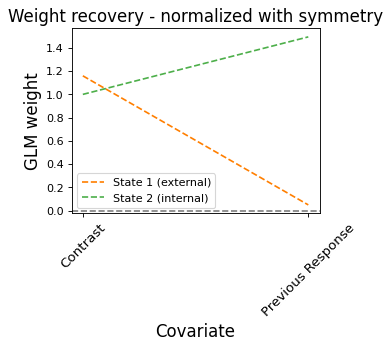

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
cols = ['#ff7f00', '#4daf4a', '#377eb8',  '#8B0000', '#000000']
for k in range(num_states):
    if k ==0:     
        plt.plot(range(input_dim), -recovered_weights[k][0], color=cols[k],
                     lw=1.5,  label = "State 1 (external)", linestyle = '--')
    else:
        plt.plot(range(input_dim), -recovered_weights[k][0], color=cols[k],
                     lw=1.5,  label = 'State 2 (internal)', linestyle = '--')
plt.yticks(fontsize=10)
plt.ylabel("GLM weight", fontsize=15)
plt.xlabel("Covariate", fontsize=15)

if bias == True:
    plt.xticks([0, 1, 2], [ext_var_title, 'Previous Response', 'Bias'], fontsize=12, rotation=45) 
else:
    plt.xticks([0, 1], [ext_var_title, 'Previous Response'], fontsize=12, rotation=45)
    

plt.axhline(y=0, color="k", alpha=0.5, ls="--")
plt.legend()
plt.title(f"Weight recovery{test_type_title}", fontsize=15)
if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/weight_recovery.png', bbox_inches='tight') 

We see that previous_response has no weight in external state.

## Weights Matrix

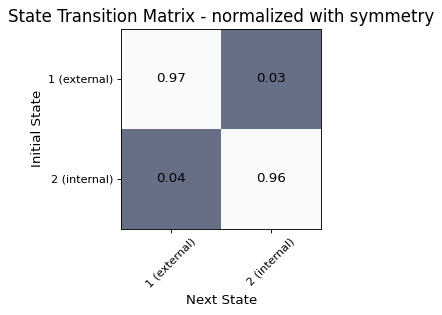

In [ ]:
fig = plt.figure(figsize=(5, 2.5), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(recovered_trans_mat, vmin=-0.8, vmax=1, cmap='bone')
for i in range(recovered_trans_mat.shape[0]):
    for j in range(recovered_trans_mat.shape[1]):
        text = plt.text(j, i, str(np.around(recovered_trans_mat[i, j], decimals=2)), ha="center", va="center",
                        color="k", fontsize=12)
plt.xlim(-0.5, num_states - 0.5)
plt.xticks(range(0, num_states), ('1 (external)', '2 (internal)'), fontsize=10, rotation=45)
plt.yticks(range(0, num_states), ('1 (external)', '2 (internal)'), fontsize=10)
plt.ylim(num_states - 0.5, -0.5)
plt.xlabel('Next State', fontsize=12)
plt.ylabel('Initial State', fontsize=12)
plt.title(f"State Transition Matrix{test_type_title}", fontsize = 15)
plt.subplots_adjust(0, 0, 1, 1)
if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/transitions.png', bbox_inches='tight') 
plt.show()

## Posterior State Probabilities

Let's now plot $p(z_{t} = k|\mathbf{y}, \{u_{t}\}_{t=1}^{T})$, the posterior state probabilities, which give the probability of the animal being in state k at trial t.

In [324]:
# run average model
prior_sigma = 10

glmhmm = HMM(num_states, obs_dim, input_dim, 
                        observations="input_driven_obs", 
                        observation_kwargs=dict(C=num_categories, prior_sigma=prior_sigma), 
                        transitions="sticky", 
                        transition_kwargs=dict(alpha=transition_alpha, kappa=0))
        
if bias == True:
    glmhmm.init_state_distn.params = np.log([0.5, 0.5, 0.5])  
    glmhmm.observations.params = -param_init_ext_int[0:6].reshape(2,1,3) 
    glmhmm.transitions.params = (param_init_ext_int[6:10].reshape(2,2),)
else: 
    glmhmm.init_state_distn.params = np.log([0.5, 0.5])
    glmhmm.observations.params = -param_init_ext_int[0:4].reshape(2,1,2)
    glmhmm.transitions.params = (param_init_ext_int[4:8].reshape(2,2),)

_ = glmhmm.fit(choices, inputs=inpts, method="em", num_iters=N_iters, initialize = False, tolerance=10**-4, verbose = False)
print(-glmhmm.observations.params)
index_ext = np.argmax(np.concatenate(-glmhmm.observations.params)[:,0])
index_int = np.argmin(np.concatenate(-glmhmm.observations.params)[:,0])

[[[1.15915229 0.04842314]]

 [[1.00005249 1.49279365]]]


In [325]:
# Get expected states:
posterior_probs = [glmhmm.expected_states(data=data, input=inpt)[0]
                for data, inpt
                in zip(choices, inpts)]

### For one sample

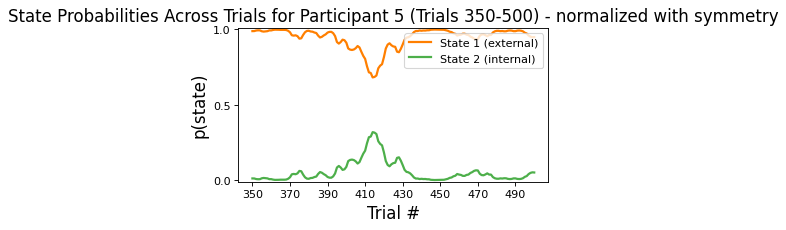

In [ ]:
fig = plt.figure(figsize=(5, 2.5), dpi=80, facecolor='w', edgecolor='k')
sess_id = 4 #session id; can choose any index between 0 and num_sess-1
n_initial = x_sample[0]
n_final = x_sample[-1]+1
for k in range(num_states):
    if k==0:
        plt.plot(posterior_probs[sess_id][n_initial:n_final, k], label="State 1 (external)", lw=2,
             color=cols[k])
    else:
        plt.plot(posterior_probs[sess_id][n_initial:n_final, k], label="State 2 (internal)", lw=2,
             color=cols[k])
plt.ylim((-0.01, 1.01))
plt.yticks([0, 0.5, 1], fontsize = 10)
plt.xlabel("Trial #", fontsize = 15)
plt.ylabel("p(state)", fontsize = 15)
plt.legend(loc="upper right", fontsize=10, title_fontsize=12)
plt.xticks(ticks=np.arange(0, n_final - n_initial, 20), labels=np.arange(n_initial, n_final, 20))
if n_initial != 0:
    plt.title(f"State Probabilities Across Trials for Participant {sess_id+1} (Trials {n_initial}-{n_final-1}){test_type_title}", fontsize=15) 
else:
    plt.title(f"State Probabilities Across Trials for Participant {sess_id+1}{test_type_title}", fontsize=15) 
if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/probabilities_sample.png', bbox_inches='tight')
plt.show()

### For all trials

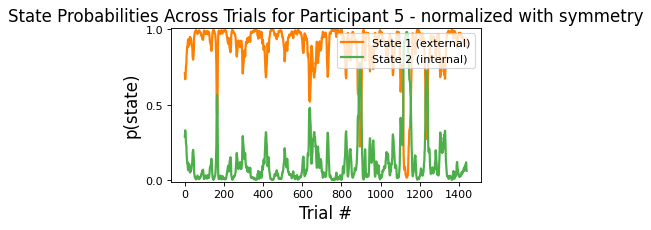

In [ ]:
fig = plt.figure(figsize=(5, 2.5), dpi=80, facecolor='w', edgecolor='k')
n_initial = x_alltrials[0]
n_final = x_alltrials[-1]+1
for k in range(num_states):
    if k==0:
        plt.plot(posterior_probs[sess_id][n_initial:n_final, k], label="State 1 (external)", lw=2,
             color=cols[k])
    else:
        plt.plot(posterior_probs[sess_id][n_initial:n_final, k], label="State 2 (internal)", lw=2,
             color=cols[k])
plt.ylim((-0.01, 1.01))
plt.yticks([0, 0.5, 1], fontsize = 10)
plt.xlabel("Trial #", fontsize = 15)
plt.ylabel("p(state)", fontsize = 15)
plt.legend(loc="upper right", fontsize=10, title_fontsize=12)
plt.xticks(ticks=np.arange(0, n_final - n_initial, 200), labels=np.arange(n_initial, n_final, 200))
if n_initial != 0:
    plt.title(f"State Probabilities Across Trials for Participant {sess_id+1} (Trials {n_initial}-{n_final-1}){test_type_title}", fontsize=15) 
else:
    plt.title(f"State Probabilities Across Trials for Participant {sess_id+1}{test_type_title}", fontsize=15) 
if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/probabilities_alltrials.png', bbox_inches='tight')
plt.show()

## Plot congruency vs model

/var/folders/hc/f0q04dfj06d1b1f0nks6jk_00000gn/T/ipykernel_8407/643779610.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((n_initial + start, -1), end - start, 2.01, color=cols[state], edgecolor='none', alpha=0.2, zorder=0)


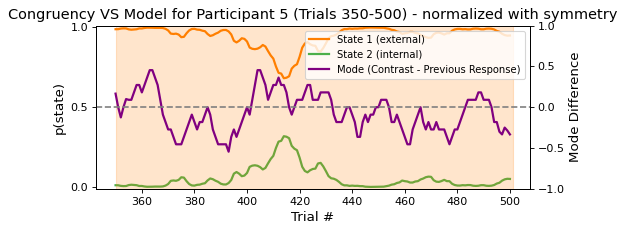

In [ ]:
fig, ax1 = plt.subplots(figsize=(7, 3), dpi=80)
n_initial = x_sample[0]
n_final = x_sample[-1]+1
# Plot posterior probabilities on ax1
for k in range(num_states):
    label = "State 1 (external)" if k == 0 else "State 2 (internal)"
    ax1.plot(x_sample, posterior_probs[sess_id][n_initial:n_final, k], label=label, lw=2, color=cols[k], zorder=1)

ax1.set_ylim(-0.01, 1.01)
ax1.set_yticks([0, 0.5, 1])
ax1.set_ylabel("p(state)", fontsize=12)
ax1.tick_params(axis='y', labelsize=10)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(x_sample, mode_sample, color="purple", linewidth=2, label=f"Mode ({ext_var_title} - Previous Response)", zorder=1)
ax2.axhline(0, color="gray", linestyle="--", linewidth=1.5)
ax2.set_ylim(-1, 1)
ax2.set_ylabel("Mode Difference", fontsize=12)
ax2.tick_params(axis='y', labelsize=10)

state_sequence = np.argmax(posterior_probs[sess_id][n_initial:n_final], axis=1)

change_points = [0]
for i in range(1, len(state_sequence)):
    if state_sequence[i] != state_sequence[i - 1]:
        change_points.append(i)
change_points.append(len(state_sequence))  # Add the endpoint

# Add background rectangles based on stable intervals
for i in range(len(change_points) - 1):
    start = change_points[i]
    end = change_points[i + 1]
    state = state_sequence[start]
    rect = plt.Rectangle((n_initial + start, -1), end - start, 2.01, color=cols[state], edgecolor='none', alpha=0.2, zorder=0)
    ax2.add_patch(rect)

# Common x-axis label
ax1.set_xlabel("Trial #", fontsize=12)

# Title
if n_initial != 0:
    plt.title(f"Congruency VS Model for Participant {sess_id+1} (Trials {n_initial}-{n_final-1}){test_type_title}", fontsize=13)
else:
    plt.title(f"Congruency VS Model for Participant {sess_id+1}{test_type_title}", fontsize=13)

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=9, title_fontsize=11)

plt.tight_layout()

if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/congruencyvsmodel_sample.png', bbox_inches="tight")

plt.show()


/var/folders/hc/f0q04dfj06d1b1f0nks6jk_00000gn/T/ipykernel_8407/994778042.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((0 + start, -1), end - start, 2.01, color=cols[state], edgecolor='none', alpha=0.2, zorder=0)


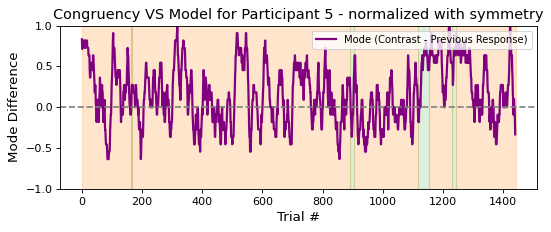

In [ ]:
fig, ax2 = plt.subplots(figsize=(7, 3), dpi=80)

n_initial = x_alltrials[0]
n_final = x_alltrials[-1]+1

ax2.plot(x_alltrials, mode_alltrials, color="purple", linewidth=2, label=f"Mode ({ext_var_title} - Previous Response)", zorder=1)
ax2.axhline(0, color="gray", linestyle="--", linewidth=1.5)
ax2.set_ylim(-1, 1)
ax2.set_ylabel("Mode Difference", fontsize=12)
ax2.tick_params(axis='y', labelsize=10)

state_sequence = np.argmax(posterior_probs[sess_id][0:n_final], axis=1)

change_points = [0]
for i in range(1, len(state_sequence)):
    if state_sequence[i] != state_sequence[i - 1]:
        change_points.append(i)
change_points.append(len(state_sequence))  # Add the endpoint

# Add background rectangles based on stable intervals
for i in range(len(change_points) - 1):
    start = change_points[i]
    end = change_points[i + 1]
    state = state_sequence[start]
    rect = plt.Rectangle((0 + start, -1), end - start, 2.01, color=cols[state], edgecolor='none', alpha=0.2, zorder=0)
    ax2.add_patch(rect)

# Common x-axis label
ax2.set_xlabel("Trial #", fontsize=12)

# Title
plt.title(f"Congruency VS Model for Participant {sess_id+1}{test_type_title}", fontsize=13)

# Legends
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc="upper right", fontsize=9, title_fontsize=11)

plt.tight_layout()

if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/congruencyvsmodel_alltrials.png', bbox_inches="tight")

plt.show()


With these posterior state probabilities, we can assign trials to states and then plot the fractional occupancy of each state:

## Fractional occupancy

In [331]:
# concatenate posterior probabilities across sessions
posterior_probs_concat = np.concatenate(posterior_probs)
# get state with maximum posterior probability at particular trial:
state_max_posterior = np.argmax(posterior_probs_concat, axis = 1)
# now obtain state fractional occupancies:
_, state_occupancies = np.unique(state_max_posterior, return_counts=True)
state_occupancies = state_occupancies/np.sum(state_occupancies)

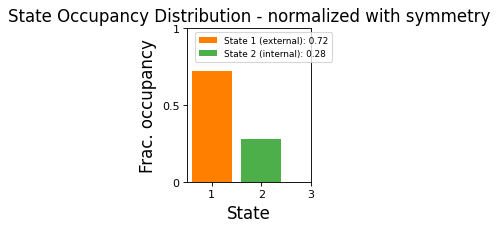

In [ ]:
fig = plt.figure(figsize=(2, 2.5), dpi=80, facecolor='w', edgecolor='k')
for z, occ in enumerate(state_occupancies):
    if z==0:
        plt.bar(z, occ, width = 0.8, color = cols[z], label=f'State 1 (external): {occ:.2f}')
    else:
        plt.bar(z, occ, width = 0.8, color = cols[z], label=f'State 2 (internal): {occ:.2f}')

plt.ylim((0, 1))
plt.xticks([0, 1, 2], ['1', '2', '3'], fontsize = 10)
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize=10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Frac. occupancy', fontsize=15)
plt.legend(loc="upper right", fontsize=8, title_fontsize=10, bbox_to_anchor=(1.2, 1))
plt.title(f"State Occupancy Distribution{test_type_title}", fontsize=15)
if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/fraction_occupancy_orientation.png', bbox_inches='tight')
plt.show()

In [ ]:
df = df.assign(Gl_Prob_State_ext = posterior_probs_concat[:,index_ext])
df = df.assign(Gl_Prob_State_int = posterior_probs_concat[:,index_int])

In [ ]:
df['Predicted_state'] = df.apply(lambda row: 1 if row['Gl_Prob_State_ext'] > row['Gl_Prob_State_int'] else 2, axis=1)

if save_data:
    df.to_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/Full_HMM_{test_type}.csv', index = False)

# Verifications

## Verify level of correctness for each state

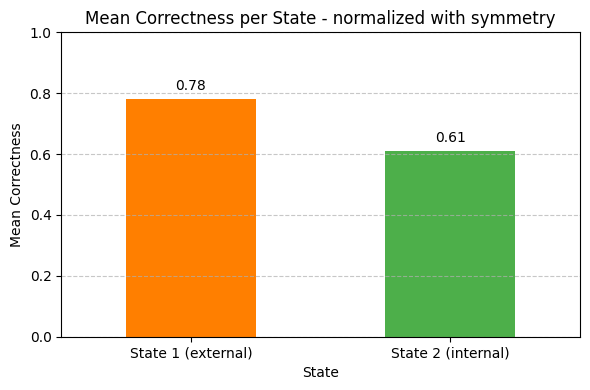

In [ ]:
mean_correctness = df.groupby('Predicted_state')['correct'].mean()

plt.figure(figsize=(6, 4))
mean_correctness.plot(kind='bar', color=['#ff7f00', '#4daf4a'])
plt.xticks(ticks=[0, 1], labels=['State 1 (external)', 'State 2 (internal)'], rotation=0)
plt.ylabel('Mean Correctness')
plt.title(f'Mean Correctness per State{test_type_title}')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(mean_correctness):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
if save_data:
    plt.savefig(root_dir + f'/plots/plots_predictive_templates/{test_type}/correctness_per_state.png', bbox_inches='tight')
plt.show()

In [ ]:
df = pd.read_csv(root_dir + f'/HMM/HMM_predictive_templates/{test_type}/Full_HMM_{test_type}.csv')

state_series = pd.Series(
    np.where(df['previous_response'] != 0, df['Predicted_state'], 100),
    index=df.index
)

transitions = state_series != state_series.shift()
group_ids = transitions.cumsum()

intervals = state_series.groupby(group_ids).agg(['first', 'size'])

mean_1 = intervals[intervals['first'] == 1]['size'].mean()
mean_2 = intervals[intervals['first'] == 2]['size'].mean()

print(f"Mean number of trials during external state (1) per interval: {mean_1:.2f} trials")
print(f"Mean number of trials during internal state (2) per interval: {mean_2:.2f} trials")


Mean interval of State 1: 67.76 samples
Mean interval of State 2: 27.52 samples


In [ ]:
df['adjusted_state'] = np.where(df['previous_response'] != 0, df['Predicted_state'], 100)

def compute_mean_intervals(group):
    group = group[group['adjusted_state'] != 100]
    state_series = group['adjusted_state'].reset_index(drop=True)
    
    
    transitions = state_series != state_series.shift()
    group_ids = transitions.cumsum()

    intervals = state_series.groupby(group_ids).agg(['first', 'size'])

    mean_1 = intervals[intervals['first'] == 1]['size'].mean()
    mean_2 = intervals[intervals['first'] == 2]['size'].mean()
    
    return pd.Series({'External_state_(1)': mean_1, 'Internal_state_(2)': mean_2})

print(f"Mean number of trials during each state per interval per ID:")
intervals_per_id = df.groupby('ID').apply(compute_mean_intervals).reset_index()


/var/folders/hc/f0q04dfj06d1b1f0nks6jk_00000gn/T/ipykernel_8407/1133423193.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  intervals_per_id = df.groupby('ID').apply(compute_mean_intervals).reset_index()


In [ ]:
def count_state_intervals(group):
    state_series = group['Predicted_state'].reset_index(drop=True)
    
    transitions = state_series != state_series.shift()
    interval_ids = transitions.cumsum()

    interval_values = state_series.groupby(interval_ids).first()
    
    num_1 = (interval_values == 1).sum()
    num_2 = (interval_values == 2).sum()
    
    return pd.Series({'intervals_state_external_(1)': num_1, 'intervals_state_internal_(2)': num_2})

print(f"Mean number of intervals per ID: {mean_1:.2f} intervals")
interval_counts = df.groupby('ID').apply(count_state_intervals).reset_index()


/var/folders/hc/f0q04dfj06d1b1f0nks6jk_00000gn/T/ipykernel_8407/3613553228.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  interval_counts = df.groupby('ID').apply(count_state_intervals).reset_index()
